In [8]:
#import packages
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#grab what we will use from matplotlib
colors = matplotlib.colors

#silent warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Import Dataset from Local Hard Drive
cac_df = pd.read_csv('../CSV/TSLA.csv')


cac_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
# Display a summary of statistical measure of this data
cac_df.info() # give the complacte inforamtion of dataset including datatypes null values 
cac_df.describe() # give the statistical informaion of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2524 non-null   object 
 1   Open       2524 non-null   float64
 2   High       2524 non-null   float64
 3   Low        2524 non-null   float64
 4   Close      2524 non-null   float64
 5   Adj Close  2524 non-null   float64
 6   Volume     2524 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 138.2+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2.524000e+03
mean,42.336602,43.172334,41.480411,42.361376,42.361376,3.032698e+07
std,34.391939,35.264479,33.513879,34.466313,34.466313,2.828038e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.016000,7.117500,6.907000,7.019000,7.019000,1.017062e+07
50%,43.570999,44.296001,42.858000,43.638001,43.638001,2.398300e+07
75%,56.719499,57.838501,55.741500,56.900499,56.900499,3.924075e+07
max,281.002014,285.899994,267.342010,277.971985,277.971985,3.046940e+08


In [11]:
# Change String Date to Datetime Format
cac_df['Date'] = pd.to_datetime(cac_df['Date']) 
print(cac_df.Date.head())

print('There are {} number of days in the dataset.'.format(cac_df.shape[0]))

0   2010-06-29
1   2010-06-30
2   2010-07-01
3   2010-07-02
4   2010-07-06
Name: Date, dtype: datetime64[ns]
There are 2524 number of days in the dataset.


In [12]:
# Set Datetime to Index
cac_df.set_index('Date', inplace=True)
cac_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
# Feature Selection & Data Resampling
def get_technical_indicators(dataset): #function to generate feature technical indicators
  # Create 7 and 21 days Moving Average
  dataset['ma7'] = dataset['Close'].rolling(window = 7).mean()
  dataset['ma21'] = dataset['Close'].rolling(window = 21).mean()
  
  #Create MACD
  dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
  dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
  dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
  
  #Create Bollinger Bands
  dataset['20sd'] = dataset['Close'].rolling(window = 20).std()
  dataset['upper_band'] = (dataset['Close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
  dataset['lower_band'] = (dataset['Close'].rolling(window = 20).mean()) - (dataset['20sd']*2)
  
  
  #Create Exponential moving average
  dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
  
  #Create Momentum
  dataset['momentum'] = (dataset['Close']/100)-1
  #Create ARIMA
  dataset['ARIMA'] = 0
  
  return dataset

In [14]:
cac1_df = get_technical_indicators(cac_df)
cac1_df.head()

,Open,High,Low,Close,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,ARIMA
Date,,,,,,,,,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN,NaN,4.778000,4.778000,0.000000,NaN,NaN,NaN,4.778000,-0.95222,0
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,NaN,NaN,4.771769,4.771500,-0.000269,NaN,NaN,NaN,4.769000,-0.95234,0
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,NaN,NaN,4.635322,4.623381,-0.011941,NaN,NaN,NaN,4.508000,-0.95608,0
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,NaN,NaN,4.412985,4.376098,-0.036886,NaN,NaN,NaN,4.057100,-0.96160,0
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,NaN,NaN,4.136790,4.062534,-0.074256,NaN,NaN,NaN,3.498066,-0.96778,0


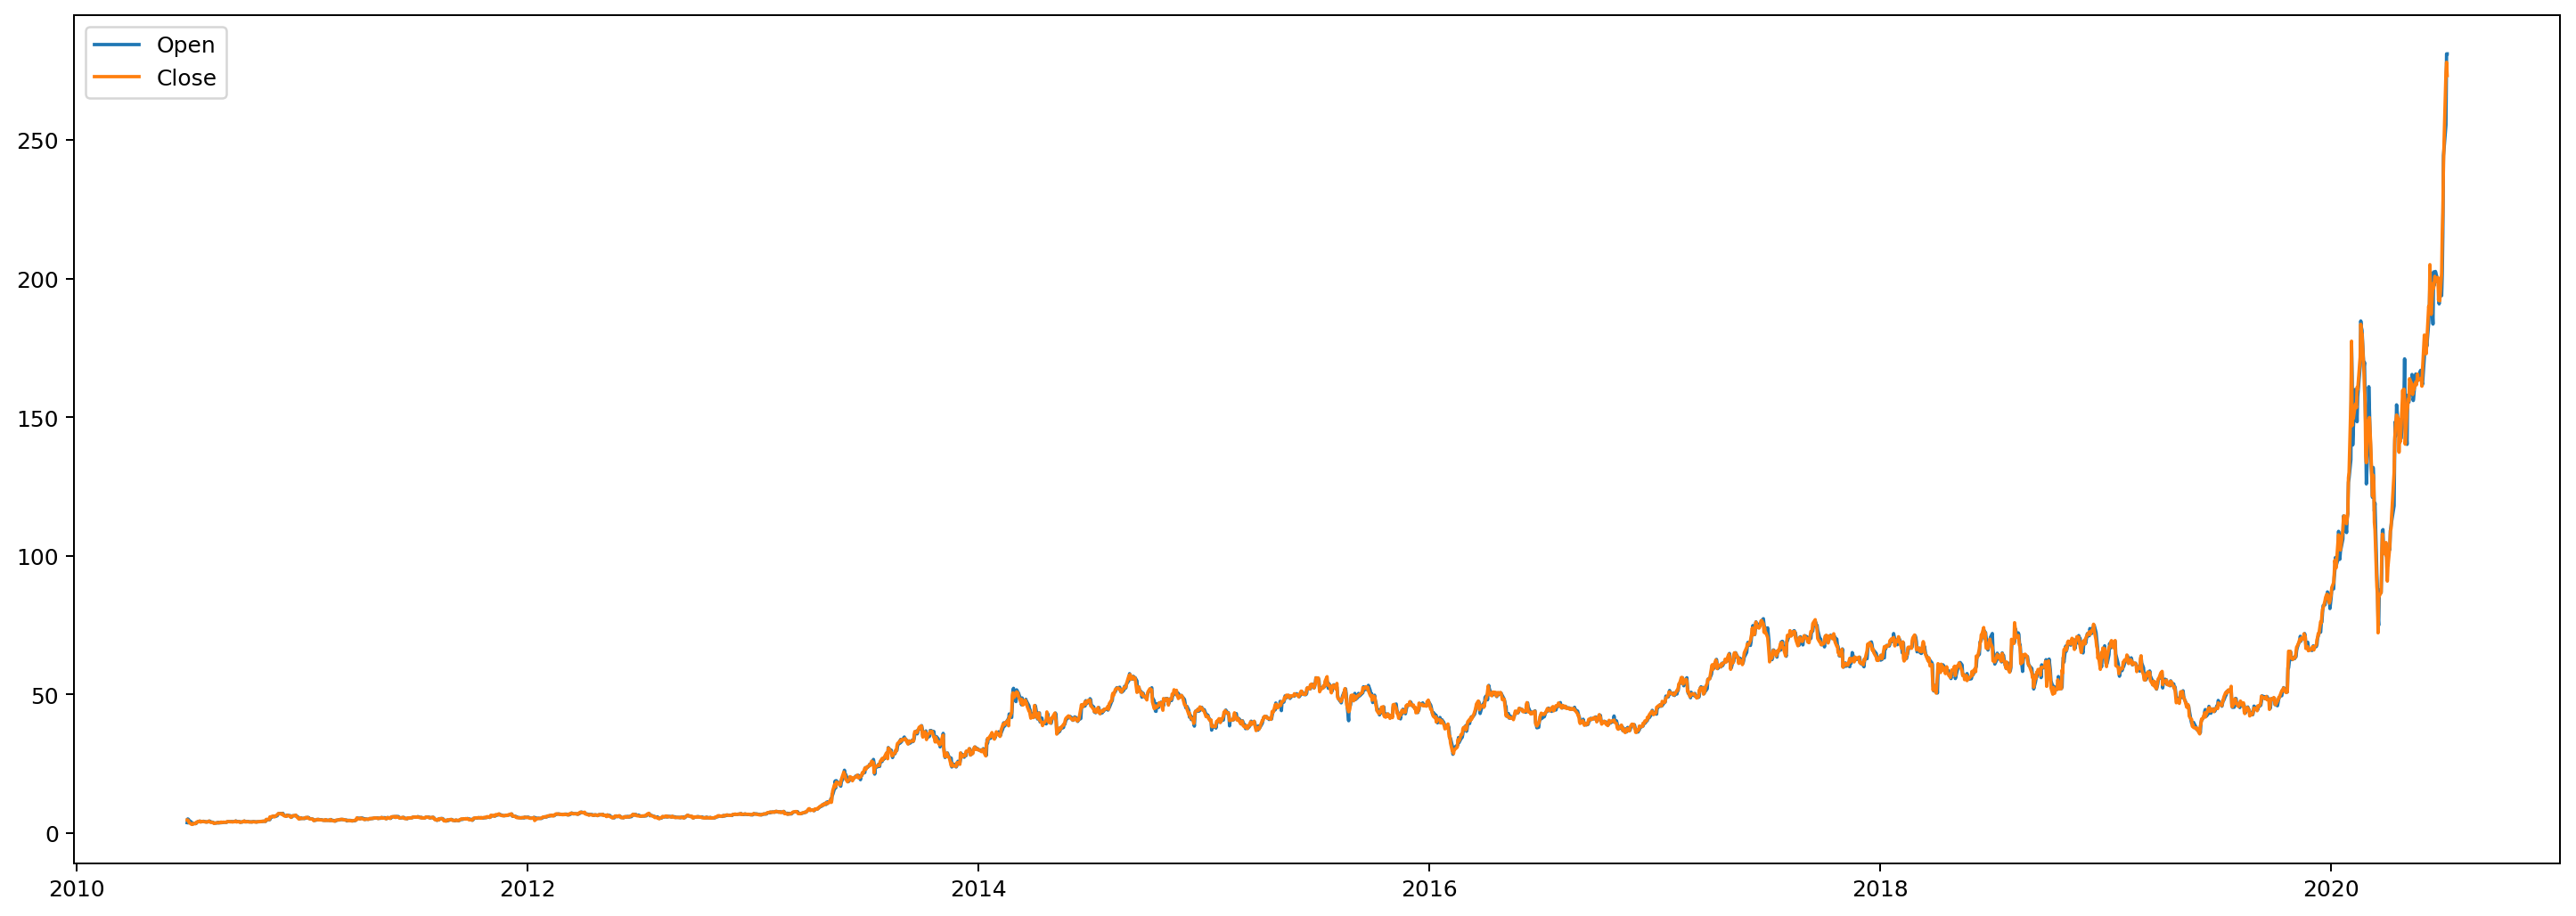

In [15]:
plt.figure(figsize=(20,7), dpi=180)
# start = 1000
# end = 1010
start = 0
end = len(cac1_df['Close'])
plt.plot(cac1_df['Open'][start:end], label="Open")
plt.plot(cac1_df['Close'][start:end], label="Close")
# cac1_df[['Open','Close']].plot()
# plt.show()
plt.legend()


In [16]:
# Split Dataset to train and test data
train_data, test_data = cac1_df[0:int(len(cac1_df)*0.7)], cac1_df[int(len(cac1_df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values


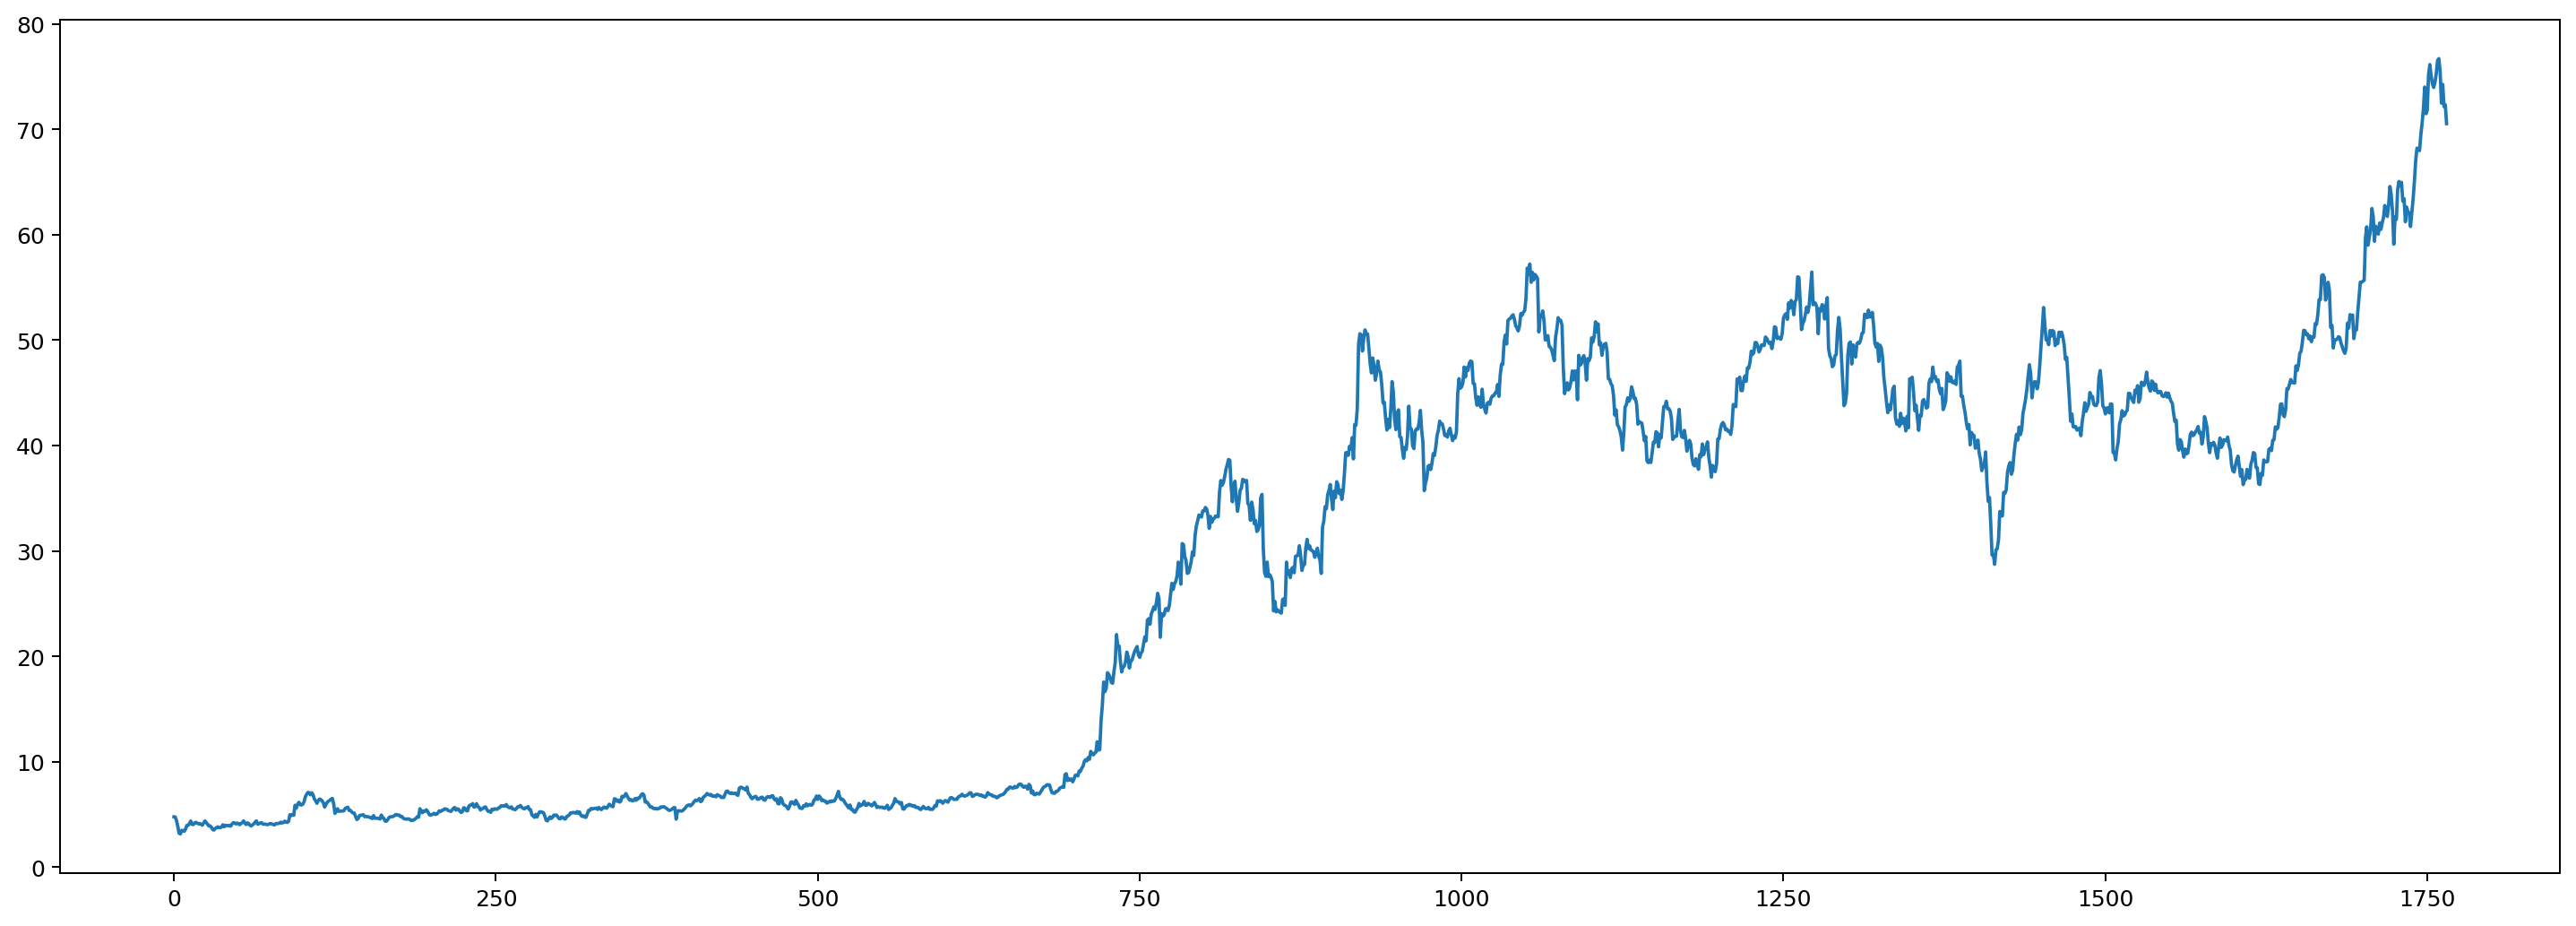

In [17]:
# Plot Training Data & Observation Data Trends
training_data1=pd.Series(training_data)

#plot training_data
# training_data1.plot(figsize=(15, 6))
plt.figure(figsize=(20,7), dpi=180)
plt.plot(training_data1)
# plt.plot(pd.Series(test_data), label="TEST DATA")
# plt.legend()
plt.show()

In [18]:
# Make First Order Difference or Second Order Difference
# Make First Order Difference
cac1_df['First Order Difference'] = cac1_df['Close'] - cac1_df['Close'].shift(1)

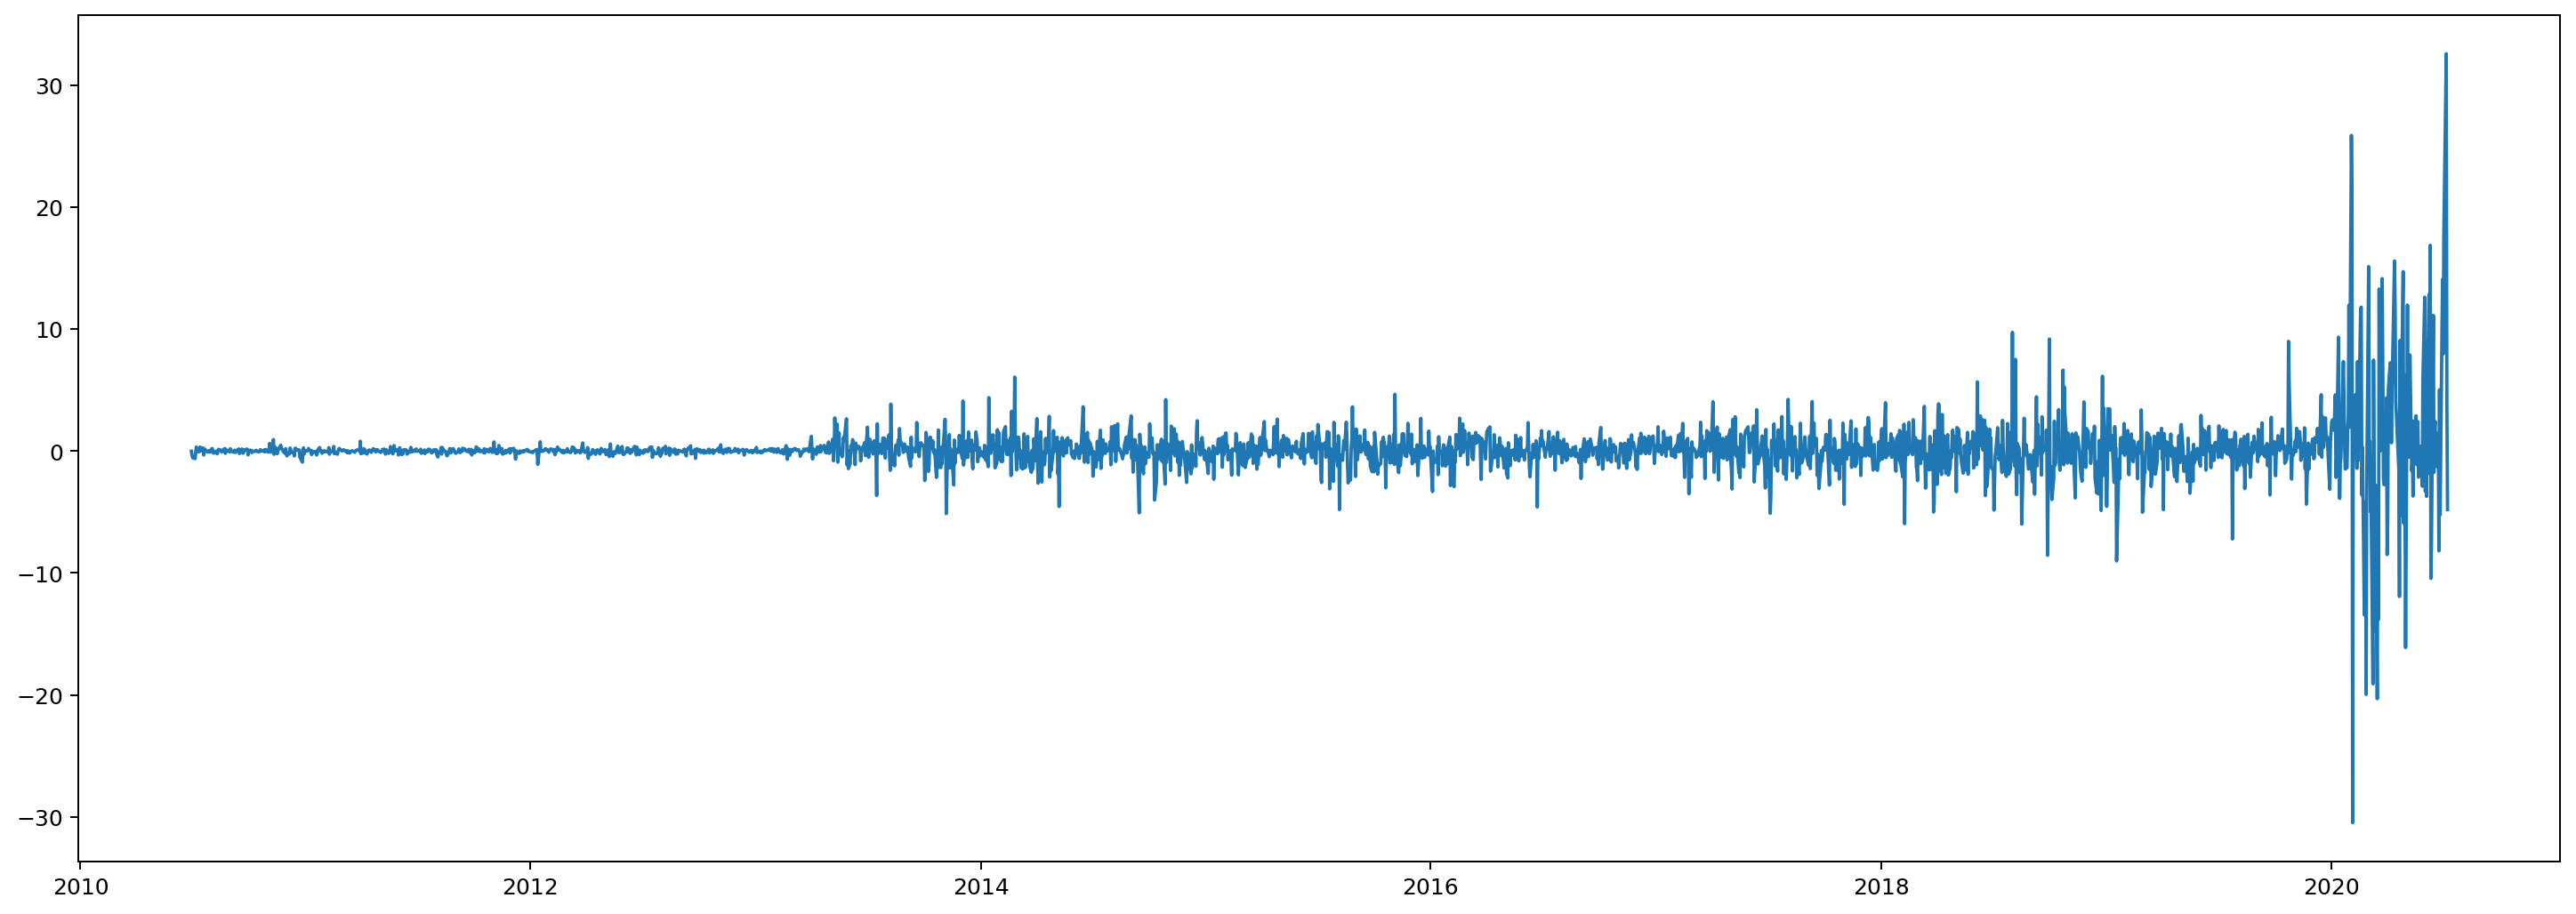

In [19]:
# Plot the Training Data After the First Order Difference
# cac1_df['First Order Difference'].plot(figsize=(12, 6))
plt.figure(figsize=(20,7), dpi=180)
plt.plot(cac1_df['First Order Difference'])
plt.show()

In [20]:
# Draw ACF&PACF Chart and Select Hyperparameter q&p
# Draw ACF Chart and Chose Hyperparameter q in MA Model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

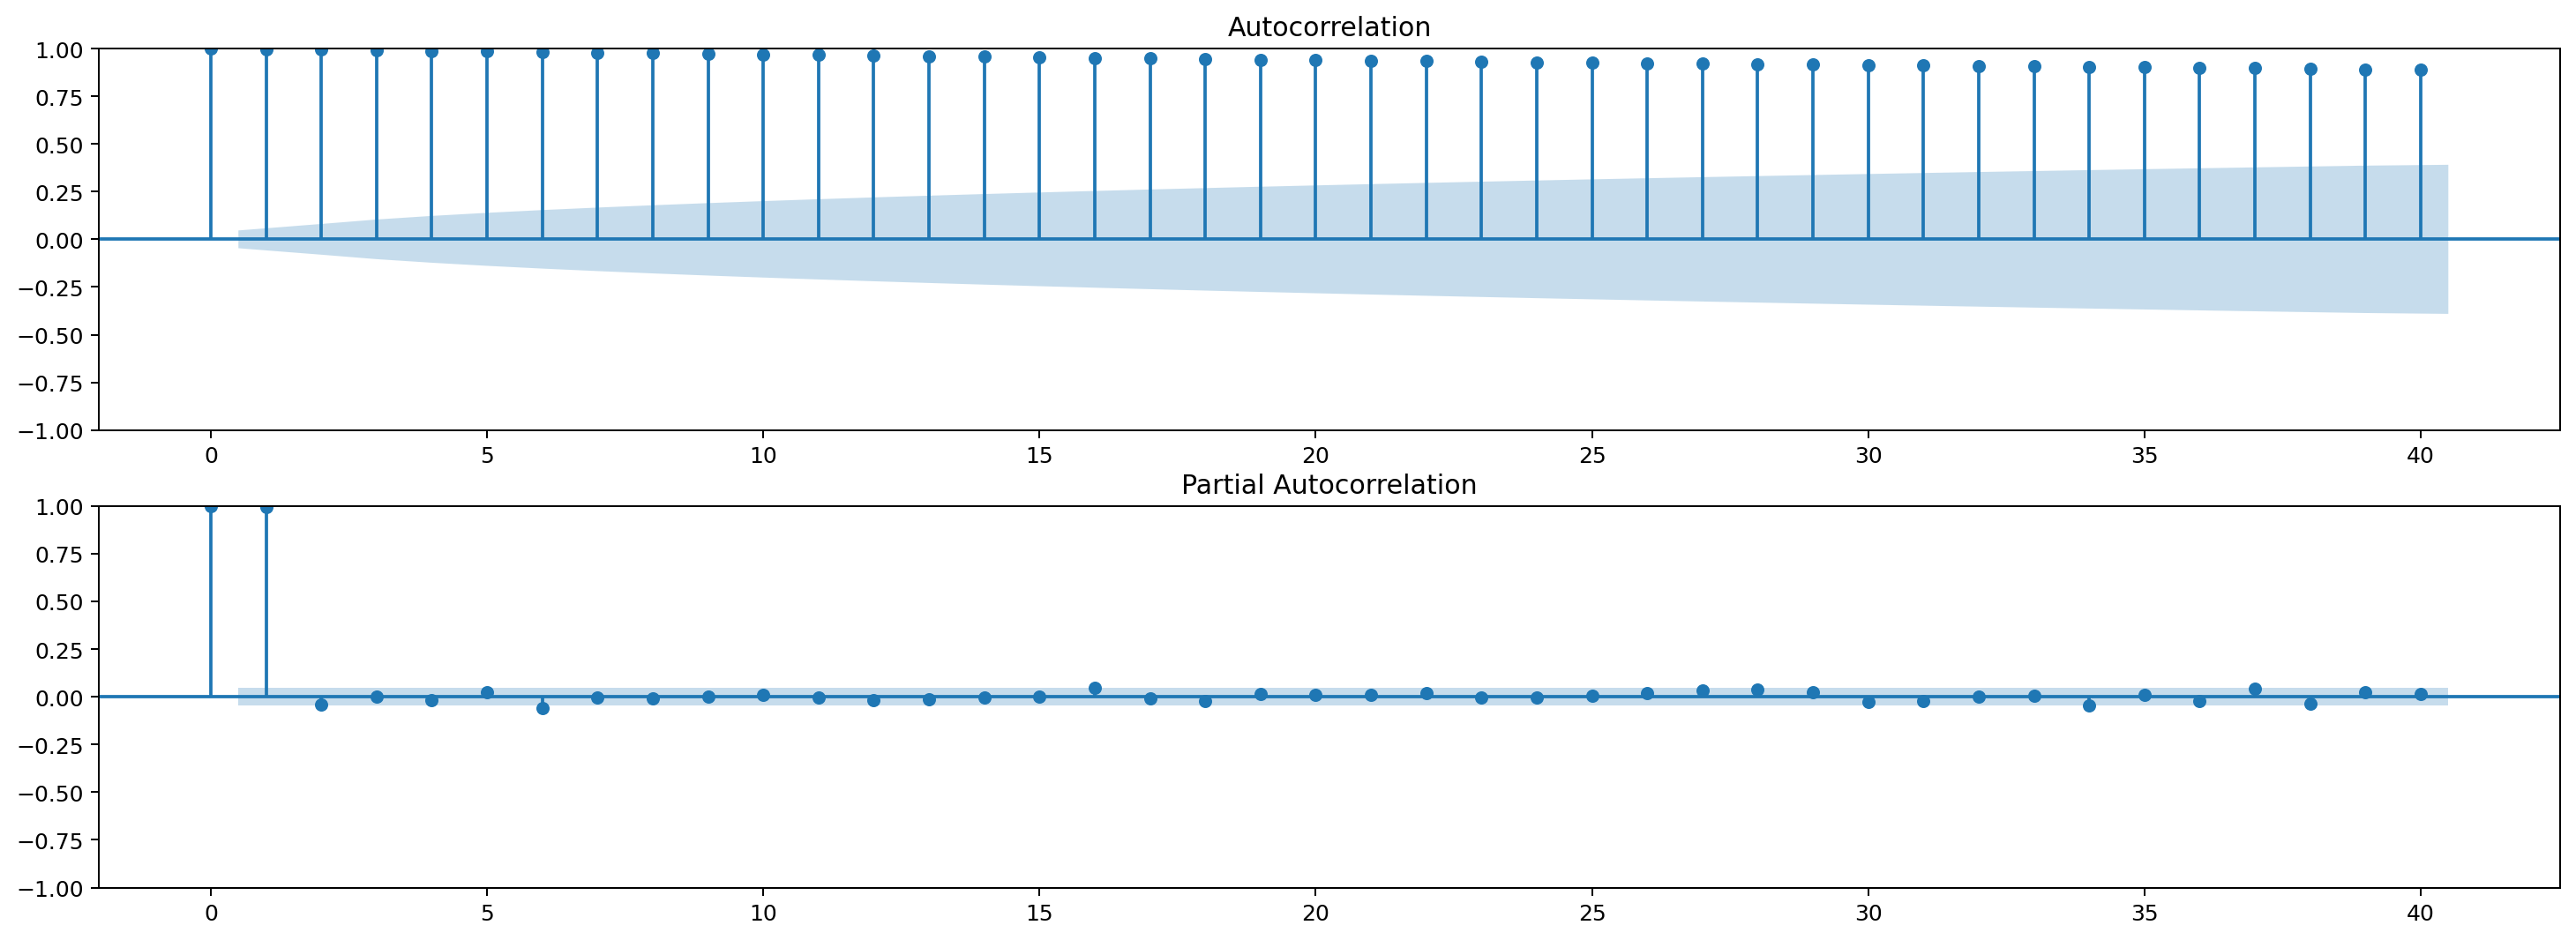

In [21]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,7), dpi=180)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_data1, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_data1, lags=40, ax=ax2) # lags=40

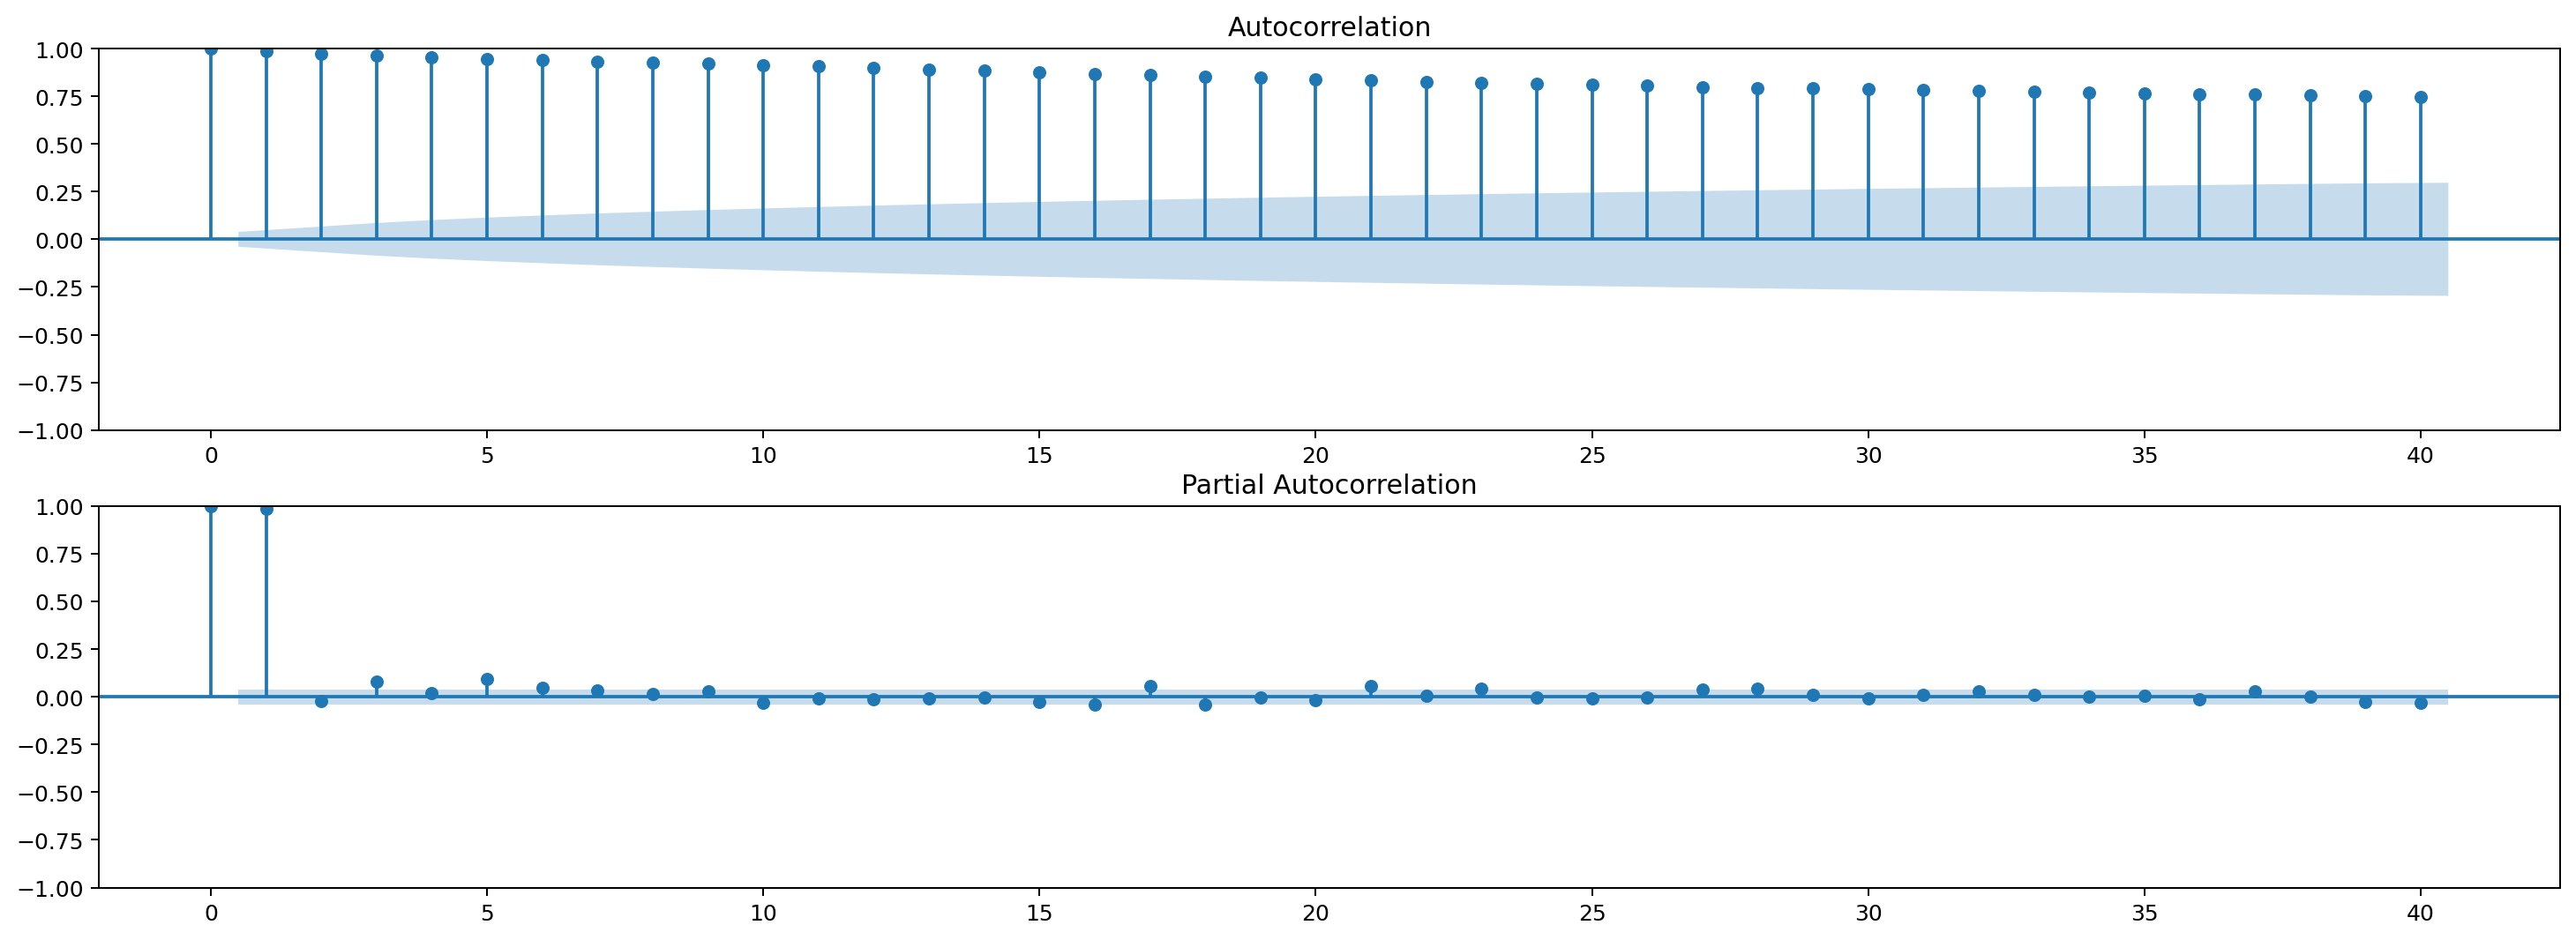

In [22]:
# Draw PACF Chart and Chose Hyperparameter p in AR Model
fig = plt.figure(figsize=(20,7), dpi=180)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cac1_df.Open, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cac1_df.Open, lags=40, ax=ax2)# lags=40

In [23]:
# Define then train the ARIMA Model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from datetime import datetime

series = cac1_df['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

/Users/darioarias/Desktop_2/DM_Stock/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/darioarias/Desktop_2/DM_Stock/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/darioarias/Desktop_2/DM_Stock/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2524
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5697.189
Date:                Mon, 16 May 2022   AIC                          11406.377
Time:                        11:14:20   BIC                          11441.376
Sample:                             0   HQIC                         11419.078
                               - 2524                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0790      0.007     11.459      0.000       0.066       0.093
ar.L2          0.0446      0.006      7.171      0.000       0.032       0.057
ar.L3          0.1037      0.007     14.016      0.0

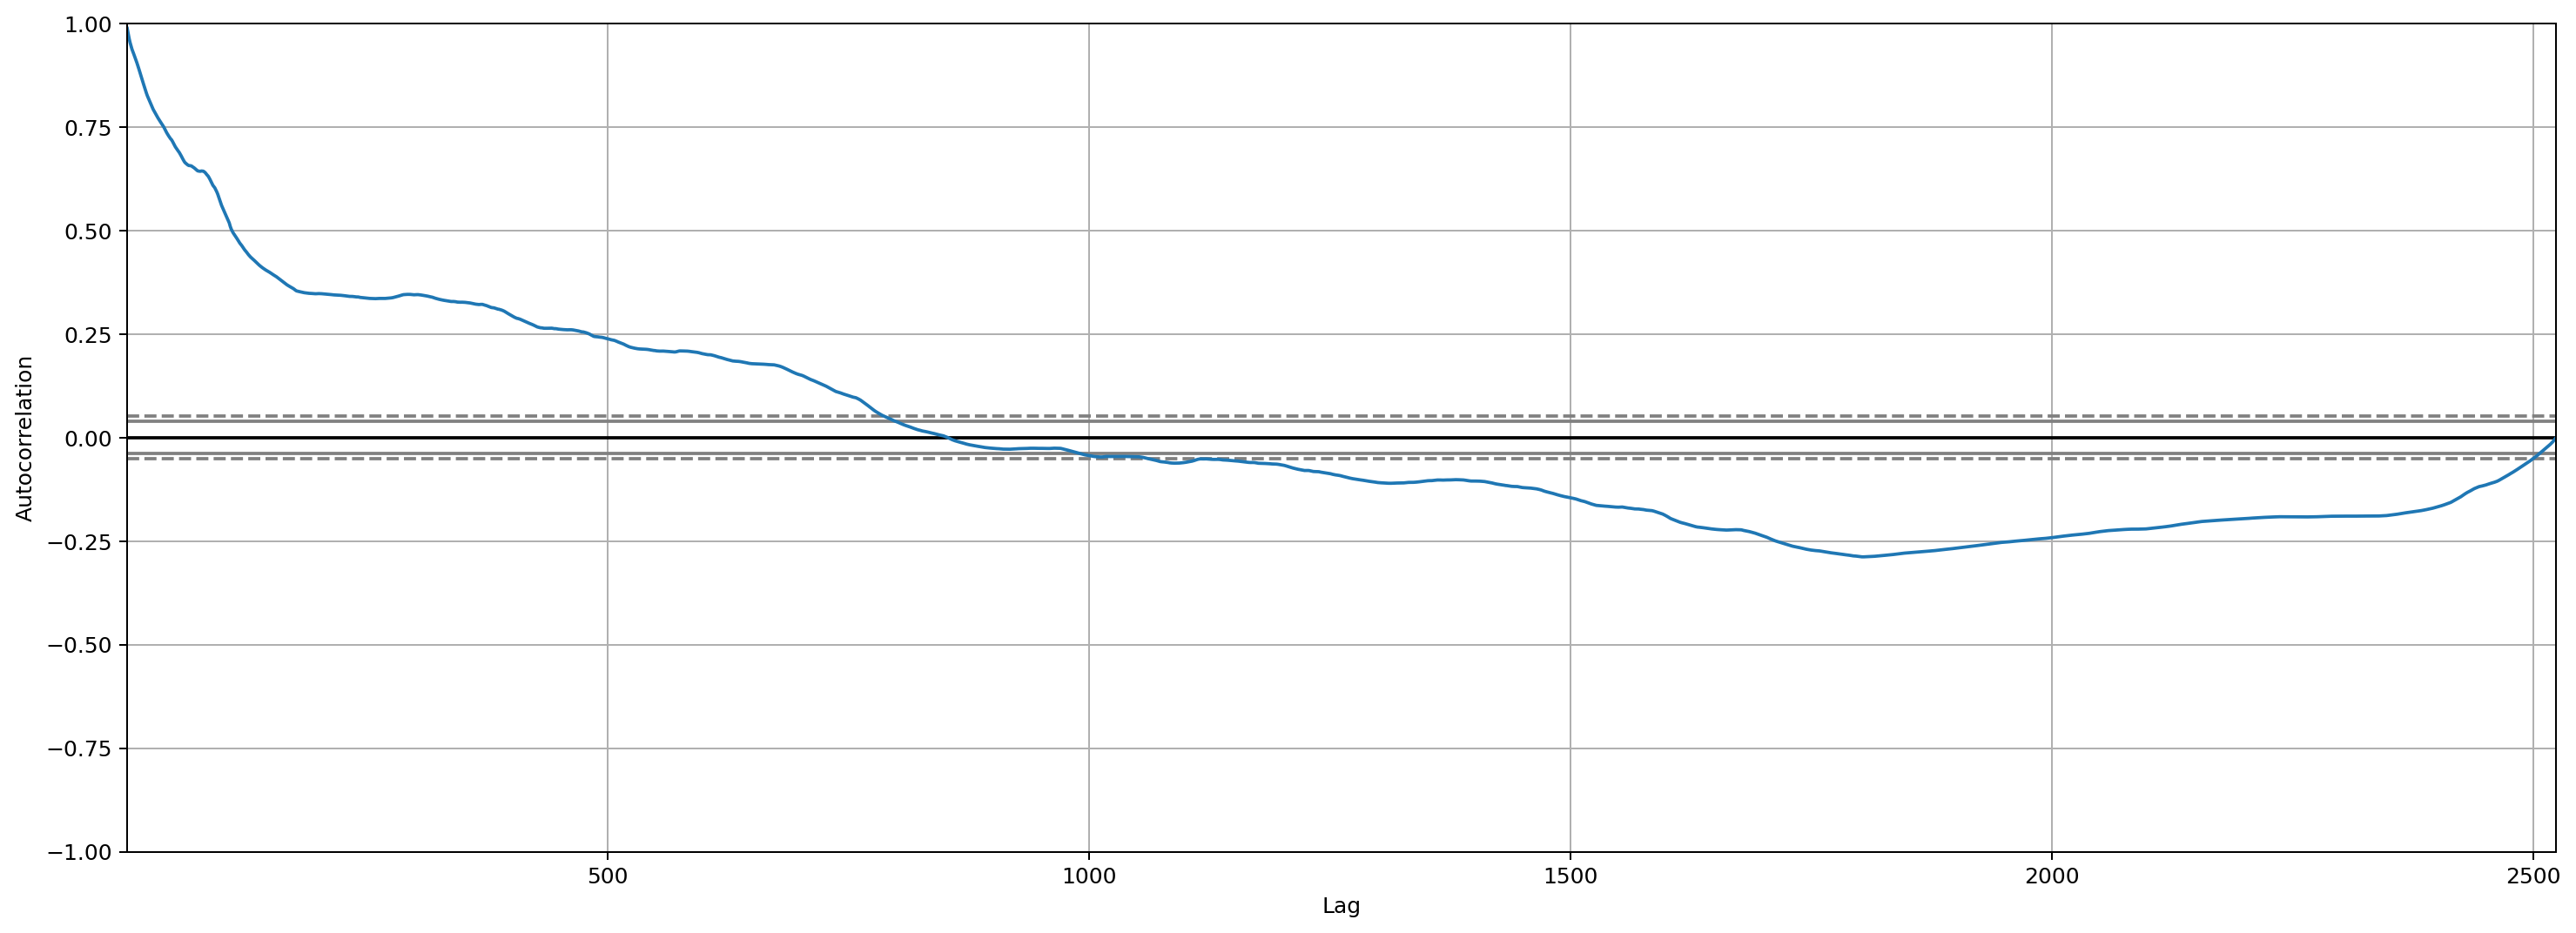

In [24]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20, 7), dpi=180)
autocorrelation_plot(series)
plt.show()

In [25]:
# Use ARIMA Model to Predict
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
train_data, test_data = X[0:int(len(X)*0.7)], X[int(len(X)*0.7):]
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
  model = ARIMA(history, order=(5, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test_data[t]
  history.append(obs)

cac1_df['ARIMA'] = pd.DataFrame(predictions)

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
Name: ARIMA, dtype: float64

In [26]:
#Evaluation the arima predicted model using RMSE
error = mean_squared_error(test_data, predictions)
print('Test RMSE: %.3f' % error)

Test RMSE: 16.904


In [27]:
#takes in an 255-base RGB representation of a color and returns a range between 0 and 1
def to_range(r:int, g:int, b:int):
  return (r/255, g/255, b/255)

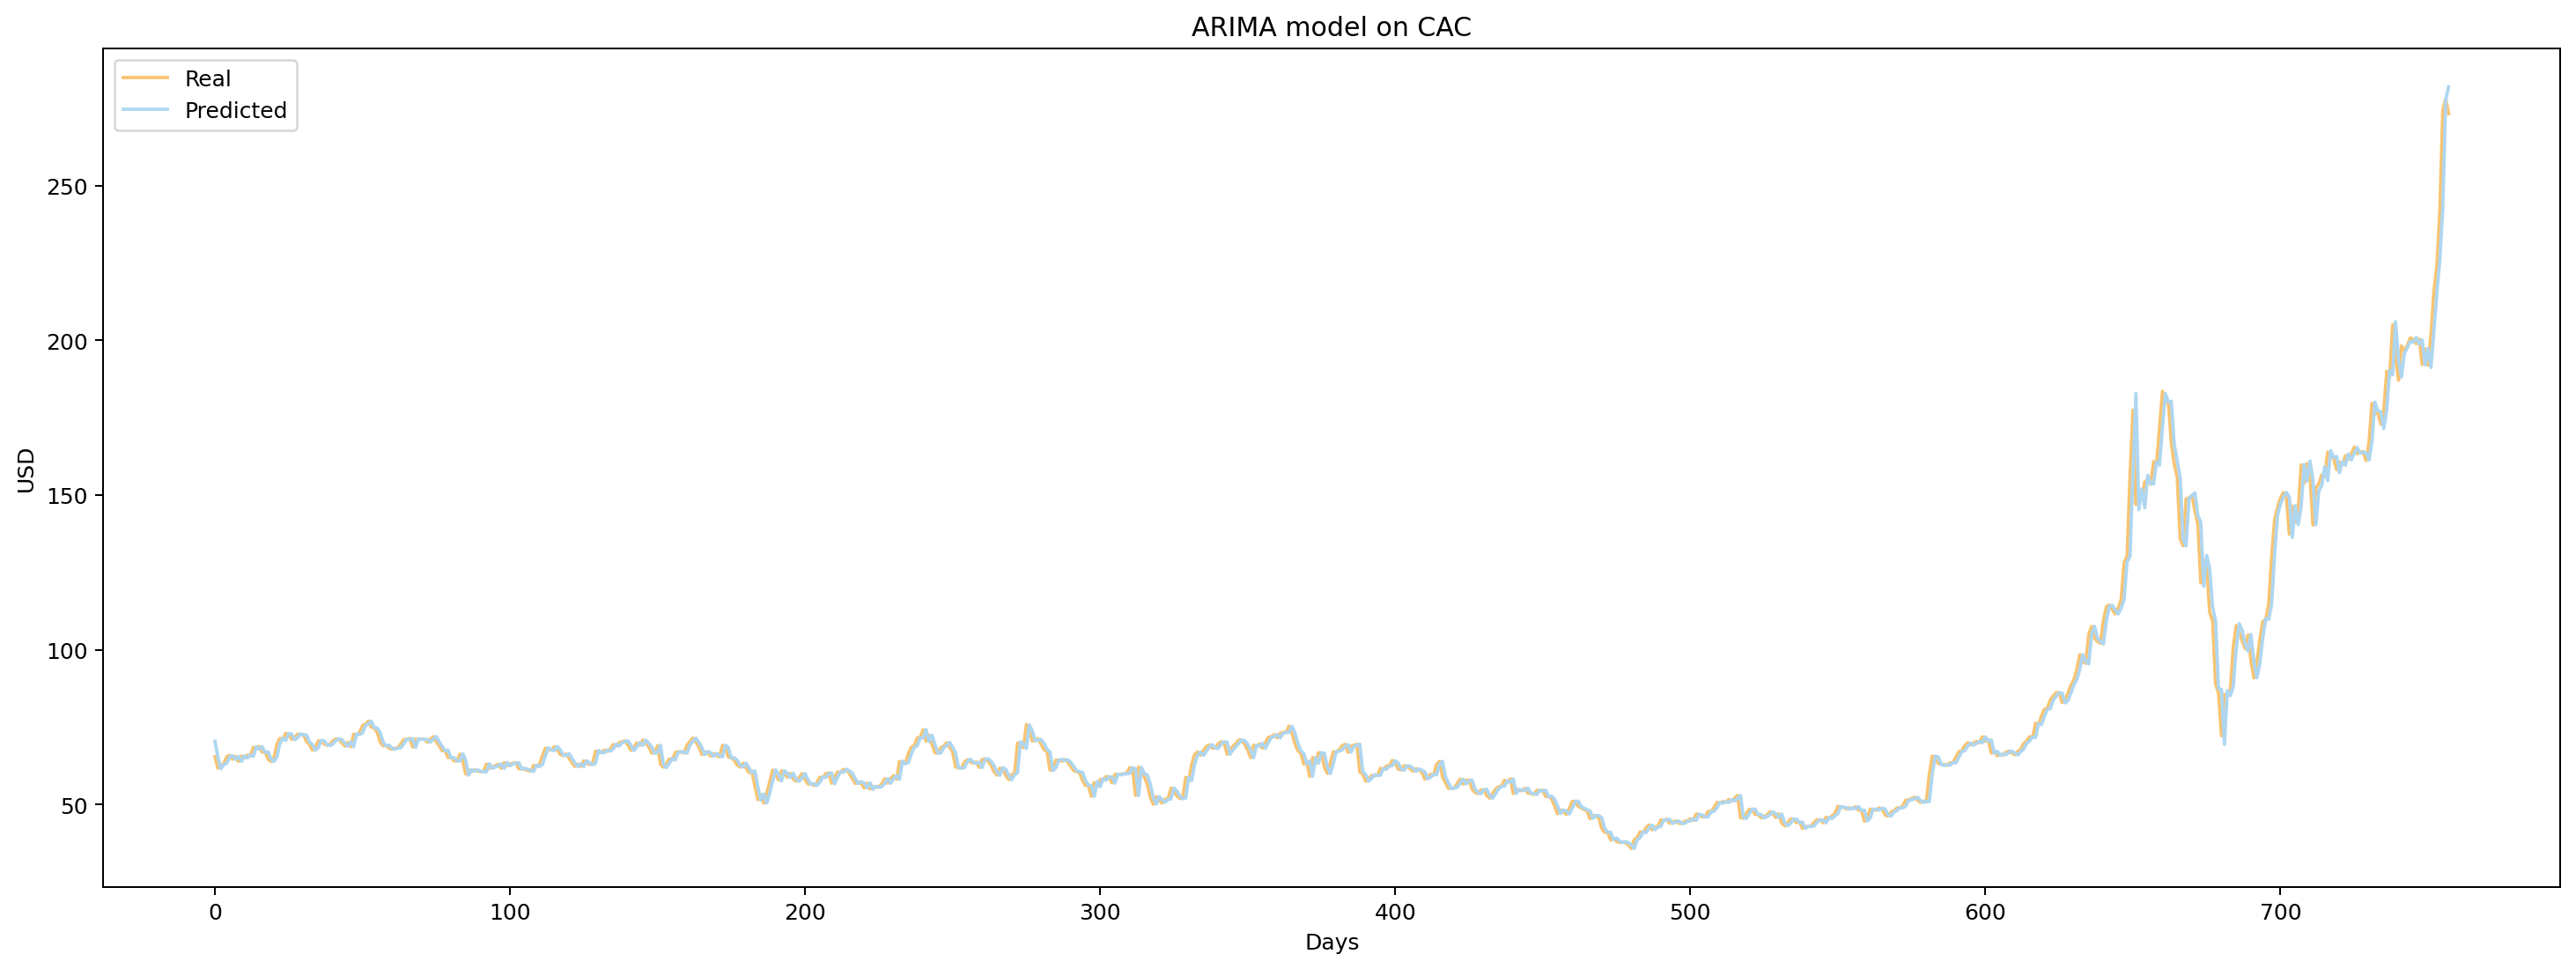

In [36]:
# Plot the Predict Result
# Plot the predicted (from ARIMA) and real prices

# start = 600
# end = 700
start = 0
end = len(test_data)
plt.figure(figsize=(20, 7), dpi=180)
plt.plot(test_data[start:end], color=colors.to_rgba(to_range(248, 196, 113)), label='Real')
plt.plot(predictions[start:end], color=colors.to_rgba(to_range(174, 214, 241)), label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA model on CAC')
plt.legend()


In [29]:
print(cac1_df.head(8))
print('Total dataset has {} samples, and {} features.'.format(cac1_df.shape[0], cac1_df.shape[1]))

             Open   High    Low  Close  Adj Close    Volume       ma7  ma21  \
Date                                                                          
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500       NaN   NaN   
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500       NaN   NaN   
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000       NaN   NaN   
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000       NaN   NaN   
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500       NaN   NaN   
2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500       NaN   NaN   
2010-07-08  3.228  3.504  3.114  3.492      3.492  38557000  3.950000   NaN   
2010-07-09  3.516  3.580  3.310  3.480      3.480  20253000  3.764571   NaN   

               26ema     12ema      MACD  20sd  upper_band  lower_band  \
Date                                                                     
2010-06-29  4.778000  4.778000  0.000000   NaN         NaN   